# Step 1 - Importing Libraries and Dataset and Viewing its Details

### 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Reading Dataset

In [2]:
data = pd.read_csv("data.csv")

### 1.3 Viewing the top 5 rows of the data using head()

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 1.4 Viewing the bottom 5 rows of the data using tail()

In [4]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 1.5 Getting all details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### 1.6 Getting Statistical Summary of the dataset

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 1.7 Checking the shape of the dataset

In [7]:
data.shape

(11914, 16)

### 1.8 Checking for null values in the dataset

In [8]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Step 2 - Dropping Irrelevent Columns

### Dropping 'Market Category' Column 
We drop the 'Market Category' column as there are too many null values in that column and it does not impact the outcome of the Machine Learning model due to its irrelevance

In [9]:
data = data.drop(['Market Category'], axis=1)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Step 3 - Renaming Columns

### Renaming the columns as instructed

In [10]:
data = data.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Step 4 - Checking and Removing Duplicates and Null Values

### 4.1 Checking for Duplicate Values and Removing them

In [11]:
#Printing number of Duplicate Values before dropping them
print("Before dropping duplicates : \n", data.duplicated().sum())

#Dropping the Duplicate Values
data = data.drop_duplicates()

#Printing number of Duplicate Values after dropping them
print("After dropping duplicates : \n", data.duplicated().sum())

Before dropping duplicates : 
 720
After dropping duplicates : 
 0


### 4.2 Checking for Null Values and Removing them

In [12]:
#Printing number of null values before dropping them
print("Before dropping null values : \n")
print(data.isnull().sum())

#Dropping the null values
data = data.dropna()

#Printing number of null values after dropping them
print("\nAfter dropping null values : \n")
print(data.isnull().sum())

Before dropping null values : 

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

After dropping null values : 

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


### 4.3 Checking the state of the dataset after dropping the duplicates and null values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11092 non-null  object 
 1   Model             11092 non-null  object 
 2   Year              11092 non-null  int64  
 3   Engine Fuel Type  11092 non-null  object 
 4   HP                11092 non-null  float64
 5   Cylinders         11092 non-null  float64
 6   Transmission      11092 non-null  object 
 7   Drive Mode        11092 non-null  object 
 8   Number of Doors   11092 non-null  float64
 9   Vehicle Size      11092 non-null  object 
 10  Vehicle Style     11092 non-null  object 
 11  MPG-H             11092 non-null  int64  
 12  MPG-C             11092 non-null  int64  
 13  Popularity        11092 non-null  int64  
 14  Price             11092 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


# Step 5 - Checking and Removing Outliers

## 5.1 Checking for Outiers using BoxPlot

### 5.1.1 Year

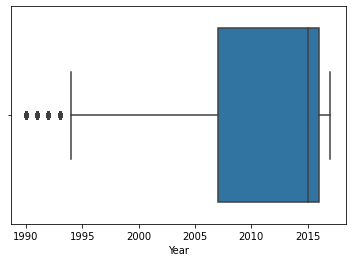

In [14]:
sns.boxplot(x=data['Year'])

### 5.1.2 HP

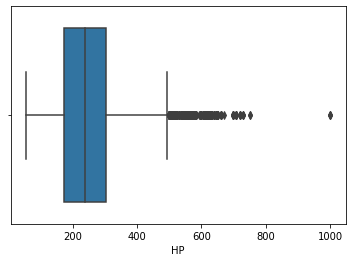

In [15]:
sns.boxplot(x=data['HP'])

### 5.1.3 Cylinders

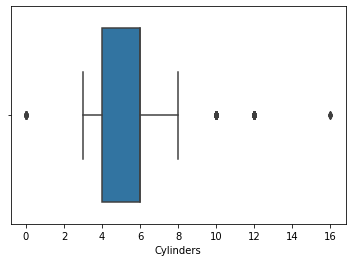

In [16]:
sns.boxplot(x=data['Cylinders'])

### 5.1.4 MPG-H

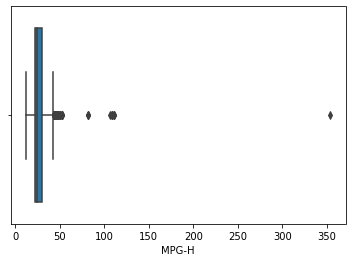

In [17]:
sns.boxplot(x=data['MPG-H'])

### 5.1.5 MPG-C

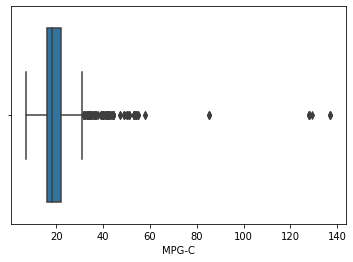

In [18]:
sns.boxplot(x=data['MPG-C'])

### 5.1.6 Popularity

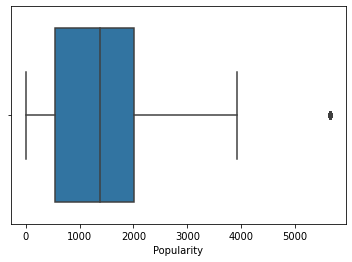

In [19]:
sns.boxplot(x=data['Popularity'])

### 5.1.7 Price

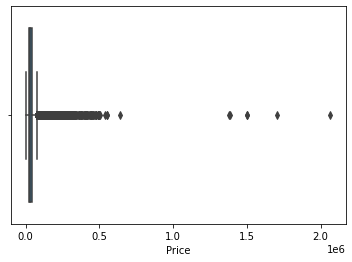

In [20]:
sns.boxplot(x=data['Price'])

## 5.2 Removing the Outliers using IQR(InterQuantile Region) method

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("The calculated IQR is :\n\n", IQR)

The calculated IQR is :

 Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21485.0
dtype: float64


In [22]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("The shape of the dataset after removing the outliers is :\n", data.shape)

The shape of the dataset after removing the outliers is :
 (8609, 15)


## 5.3 Confirming that the Outliers are removed using BoxPlot

### 5.3.1 Year

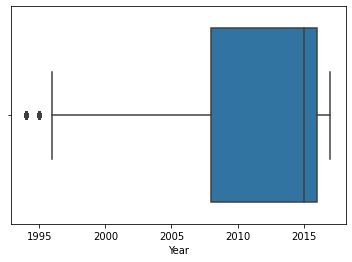

In [23]:
sns.boxplot(x=data['Year'])

### 5.3.2 HP

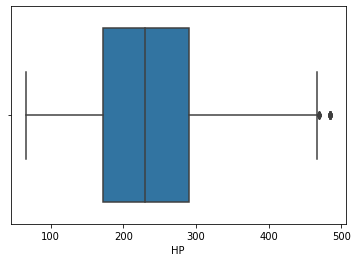

In [24]:
sns.boxplot(x=data['HP'])

### 5.3.3 Cylinders

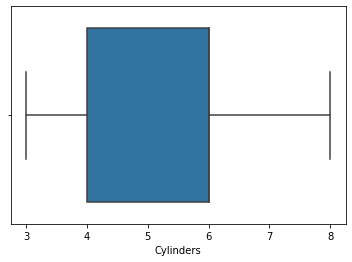

In [25]:
sns.boxplot(x=data['Cylinders'])

### 5.3.4 MPG-H

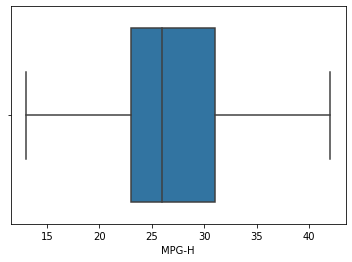

In [26]:
sns.boxplot(x=data['MPG-H'])

### 5.3.5 MPG-C

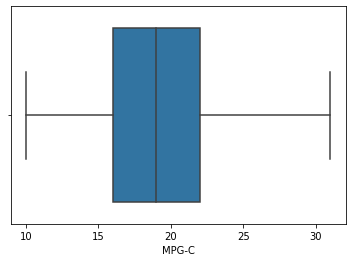

In [27]:
sns.boxplot(x=data['MPG-C'])

### 5.3.6 Popularity

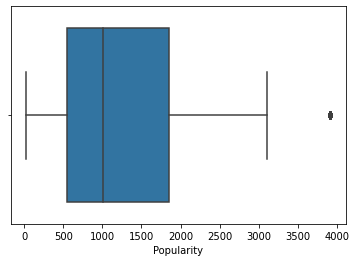

In [28]:
sns.boxplot(x=data['Popularity'])

### 5.3.7 Price

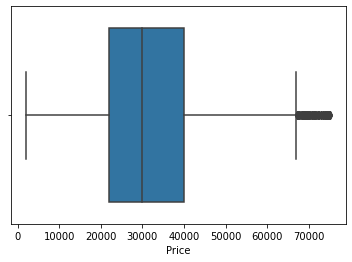

In [29]:
sns.boxplot(x=data['Price'])

# Step 6 - Top 10 Car Brands and their Average Prices

### 6.1 Finding the Top 10 Most Represented Car Brands

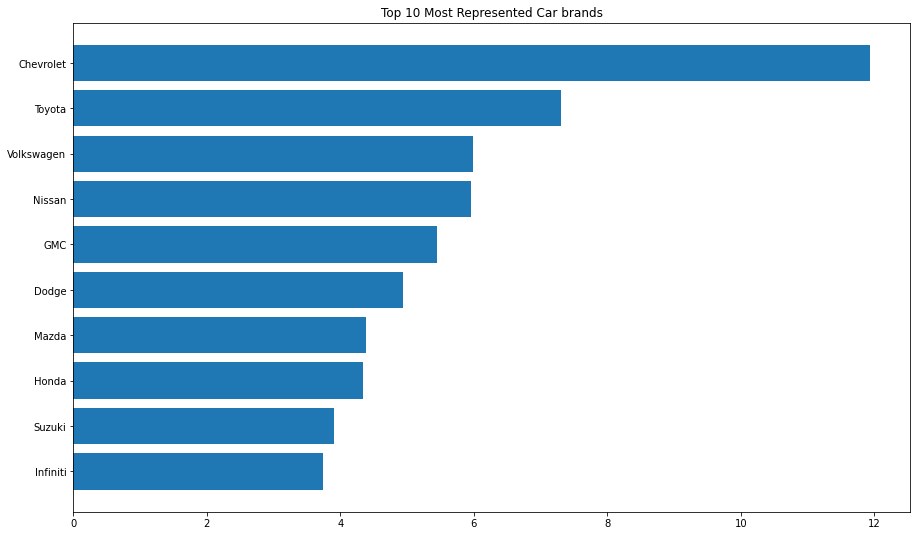

In [30]:
# Percentage of cars represented per brand
brands = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
popular_labels = brands.index[9::-1]
    
# Plotting the graph representing the top 10 brands
plt.figure(figsize=(15,9))
plt.barh(popular_labels, width=brands[9::-1])
plt.title('Top 10 Most Represented Car brands')
plt.show()

### 6.2 Calculating the Average Prices of these Brands

In [31]:
prices = data[['Make','Price']].loc[
    (data['Make'] == 'Chevrolet')|
    (data['Make'] == 'Toyota')|
    (data['Make'] == 'Volkswagen')|
    (data['Make'] == 'Nissan')|
    (data['Make'] == 'GMC')|
    (data['Make'] == 'Dodge')|
    (data['Make'] == 'Mazda')|
    (data['Make'] == 'Honda')|
    (data['Make'] == 'Suzuki')|
    (data['Make'] == 'Infiniti')
        ].groupby('Make').mean()
print("The average prices for the top brands are :\n")
print(prices)

The average prices for the top brands are :

                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18164.098214
Toyota      29011.750397
Volkswagen  29032.817476


# Step 7 - Correlation

### 7.1 Correlation Matrix

In [32]:
data.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330621,-0.094479,0.241078,0.359886,0.323710,0.204668,0.591834
HP,0.330621,1.000000,0.740964,0.044248,-0.465232,-0.563260,0.105776,0.743476
Cylinders,-0.094479,0.740964,1.000000,0.024115,-0.697892,-0.750855,0.025742,0.391990
Number of Doors,0.241078,0.044248,0.024115,1.000000,0.004763,0.021714,-0.073779,0.130505
MPG-H,0.359886,-0.465232,-0.697892,0.004763,1.000000,0.937939,0.080936,-0.127598
MPG-C,0.323710,-0.563260,-0.750855,0.021714,0.937939,1.000000,0.070418,-0.202185
Popularity,0.204668,0.105776,0.025742,-0.073779,0.080936,0.070418,1.000000,0.116907
Price,0.591834,0.743476,0.391990,0.130505,-0.127598,-0.202185,0.116907,1.000000


### 7.2 Insights - HeatMap

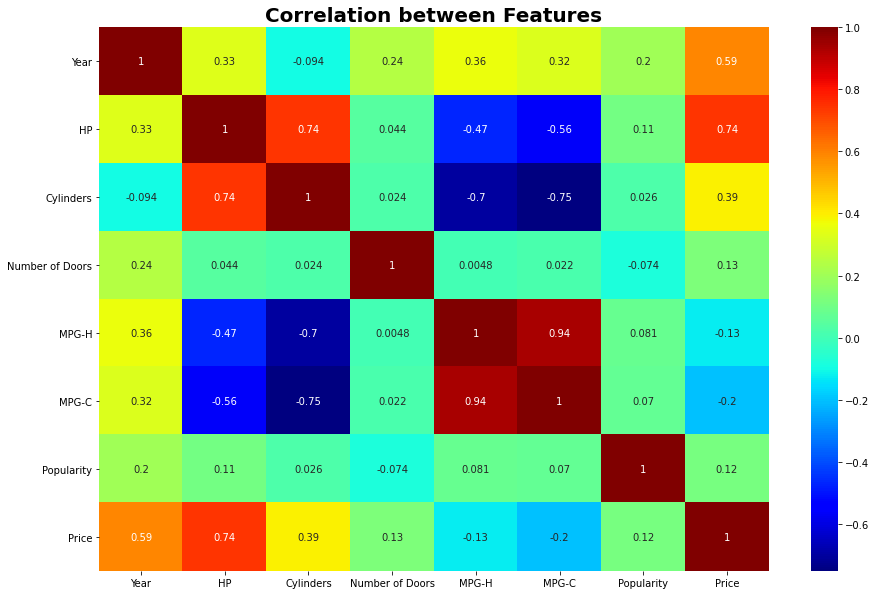

In [33]:
car_corr = data.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(car_corr, cmap='jet',annot=True)
plt.title("Correlation between Features", weight='bold', fontsize=20)
plt.show()

#### From the HeatMap, we observe :

#### Positive Correlations
    1. Year  and  Price      - 59% (Moderate)
    2. HP    and  Cylinders  - 74% (Strong)
    3. HP    and  Price      - 74% (Strong)
    4. MPG-H and  MPG-C      - 94% (Strong)

#### Negative Correlations
    1. HP        and  MPG-H      - -47% (Moderate)
    2. HP        and  MPG-C      - -56% (Moderate)
    3. Cylinders and  MPG-H      - -70% (Strong)
    4. Cylinders and  MPG-C      - -75% (Strong)

# Step 8 - Performing EDA by Plotting Graphs to find Features affecting Price

### 8.1 Make and Price

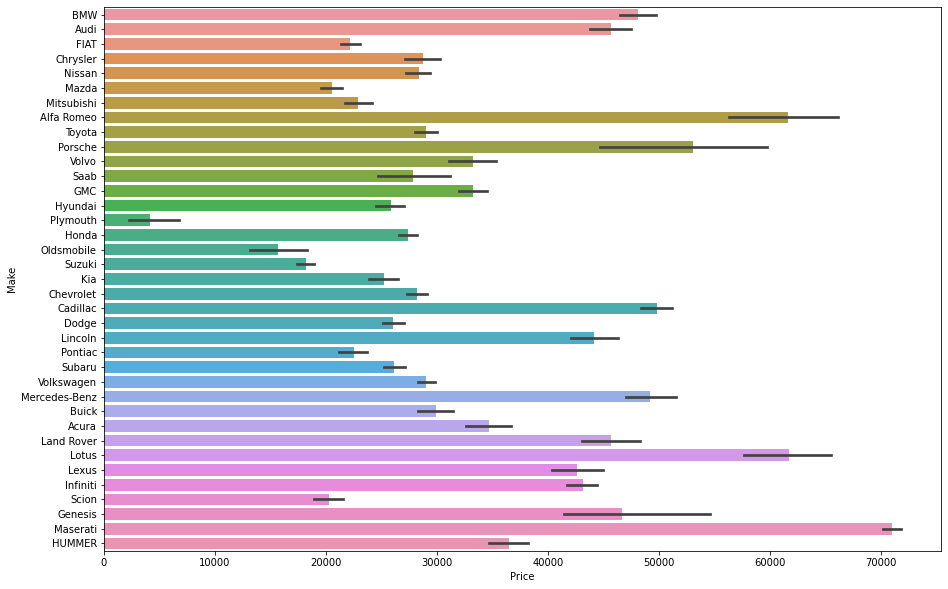

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data['Price'],data['Make'])

#### The Brand of the Car Greatly affects its Price

#### The Most Expensive Car Brands are:
    Alfa Romeo
    Porche
    Lotus
    Maserati
    
#### The Cheapest Car Brands are:
    Plymouth
    Oldsmobile

### 8.2 Year and Price

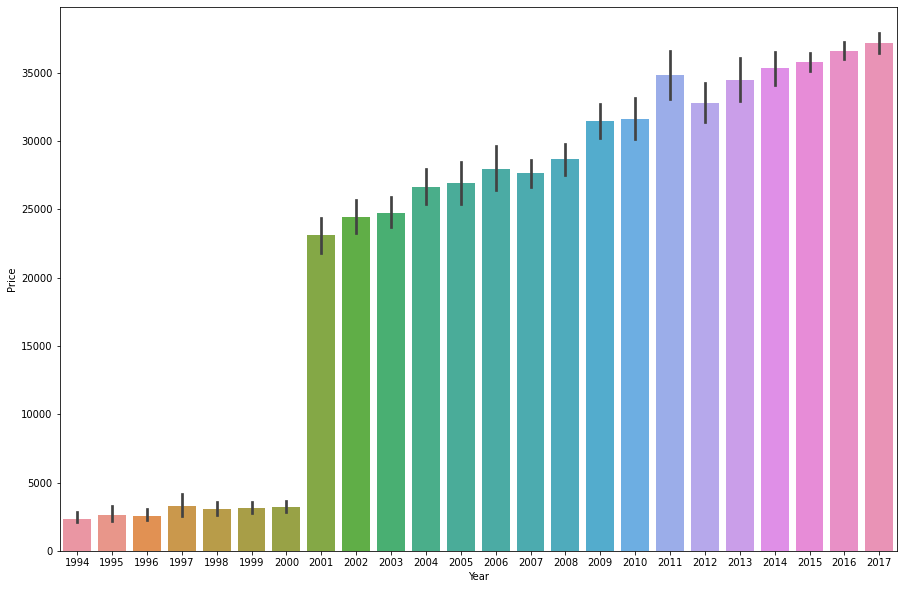

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(data['Year'],data['Price'])

#### Car Prices increased tremendously after the Year 2000 and have increased gradually since then

### 8.3 HP and Price

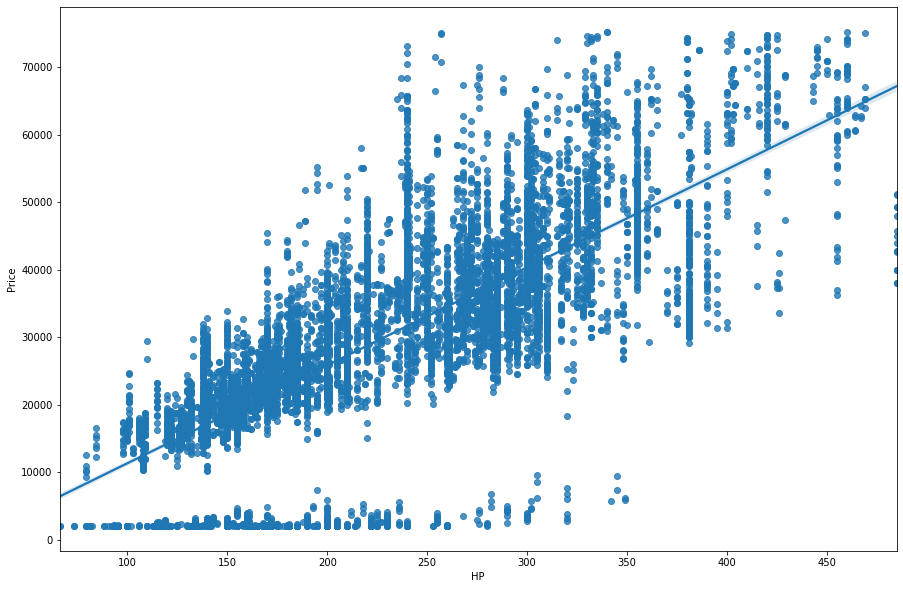

In [36]:
plt.figure(figsize=(15,10))
sns.regplot(x="HP", y="Price", data=data)

#### Price increases if HP of the Car is Higher

### 8.4 Engine Fuel Type and Price

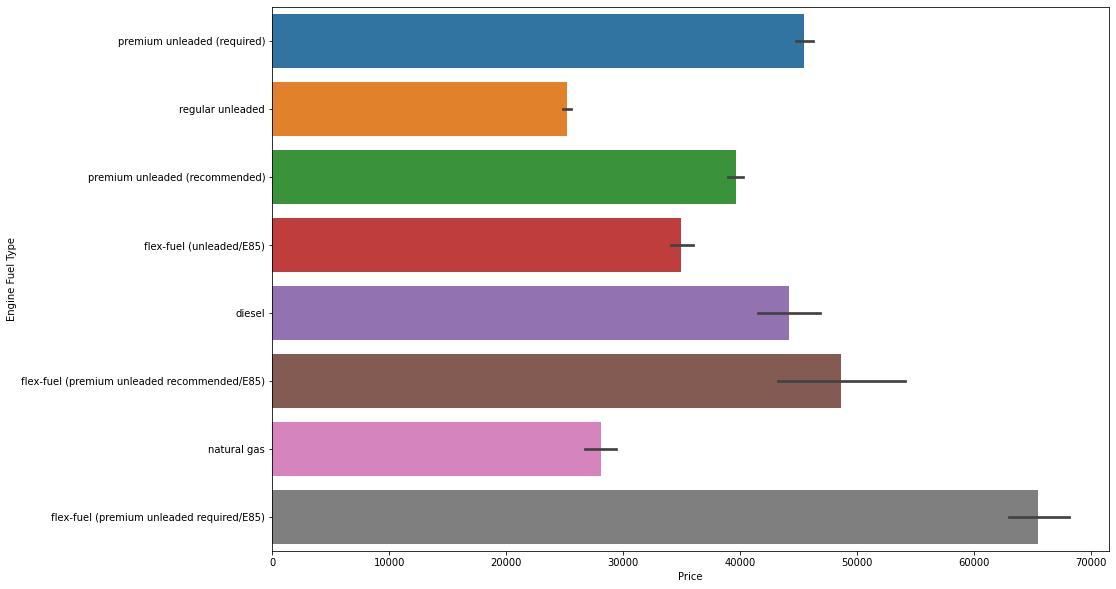

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(data['Price'],data['Engine Fuel Type'])

#### The Most Expensive Fuel Types are :
    flex-fuel (premium unleaded required/E85)
    flex-fuel (premium unleaded recommended/E85)
    
#### The Cheapest Fuel Types are :
    regular unleaded
    natural gas

### 8.5 Cylinders and Price

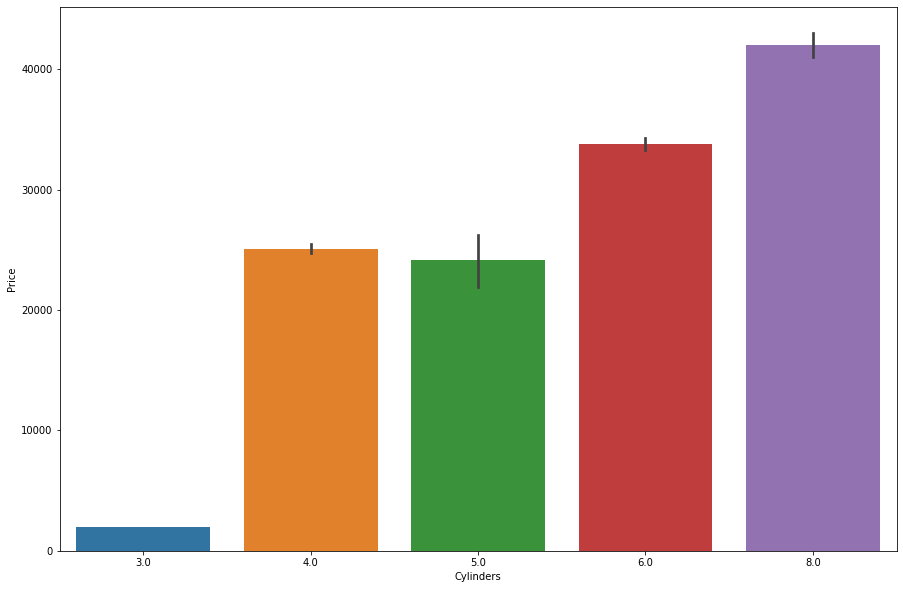

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(data['Cylinders'],data['Price'])

#### Cylinders are Positively correlated to Price
#### More the Cylinders, Higher the Price 

### 8.6 Transmission and Price

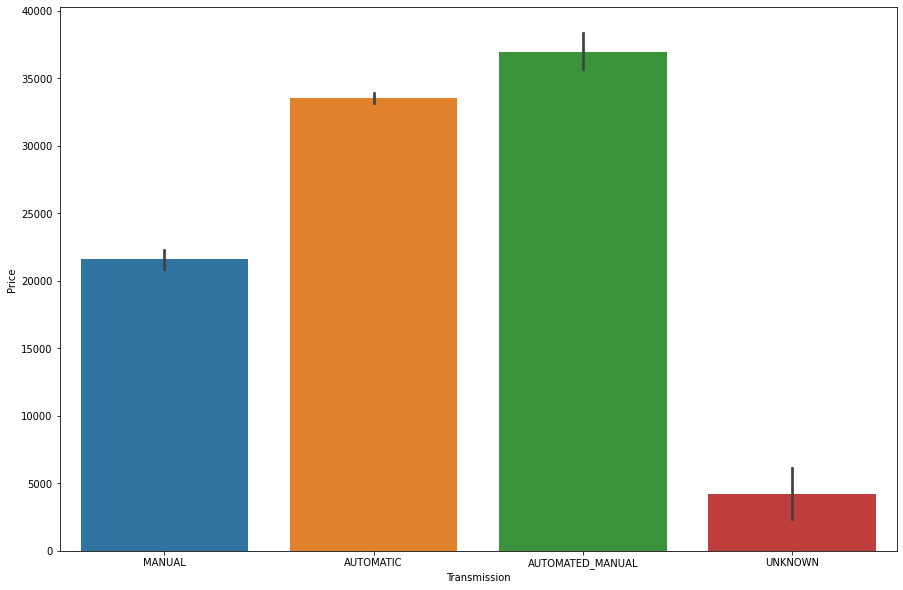

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(data['Transmission'],data['Price'])

#### Transmission affects Price in a Linear way
#### The Price increases in the following order :
    Manual
    Automatic
    Automated_Manual

We do not consider the unknown values

### 8.7 Drive Mode and Price

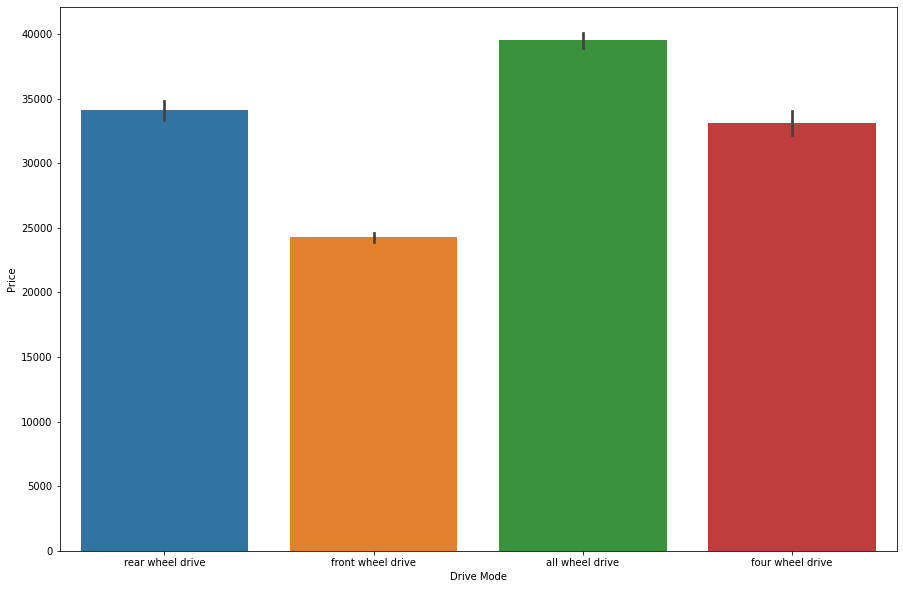

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(data['Drive Mode'],data['Price'])

#### Drive Mode also affects Price in a Linear way
#### The Price increases in the following order :
    front wheel drive
    rear wheel drive & four wheel drive
    all wheel drive

### 8.8 Number of Doors and Price

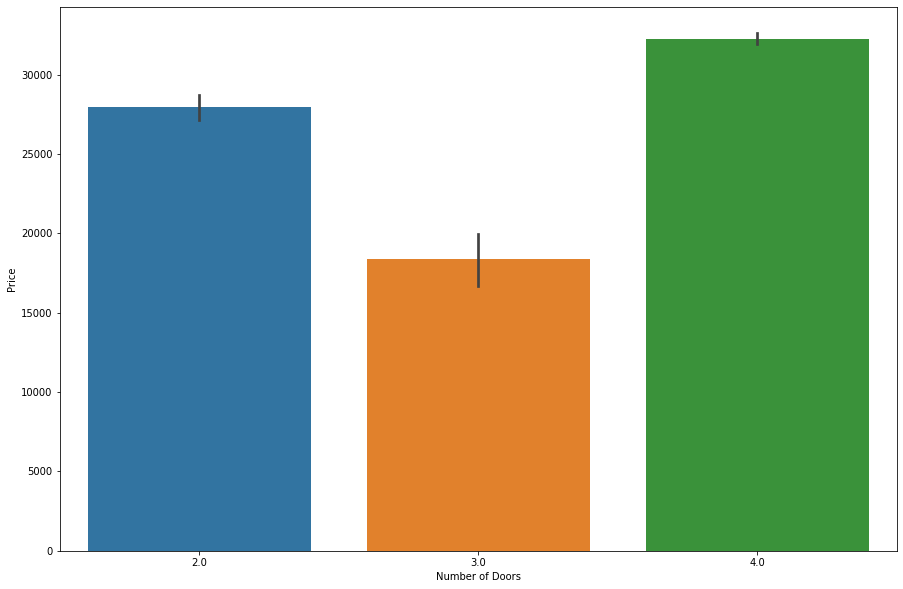

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(data['Number of Doors'],data['Price'])

#### The Price increases in the following order :
    Number of doors:
    3
    2
    4

### 8.9 Vehicle Size and Price

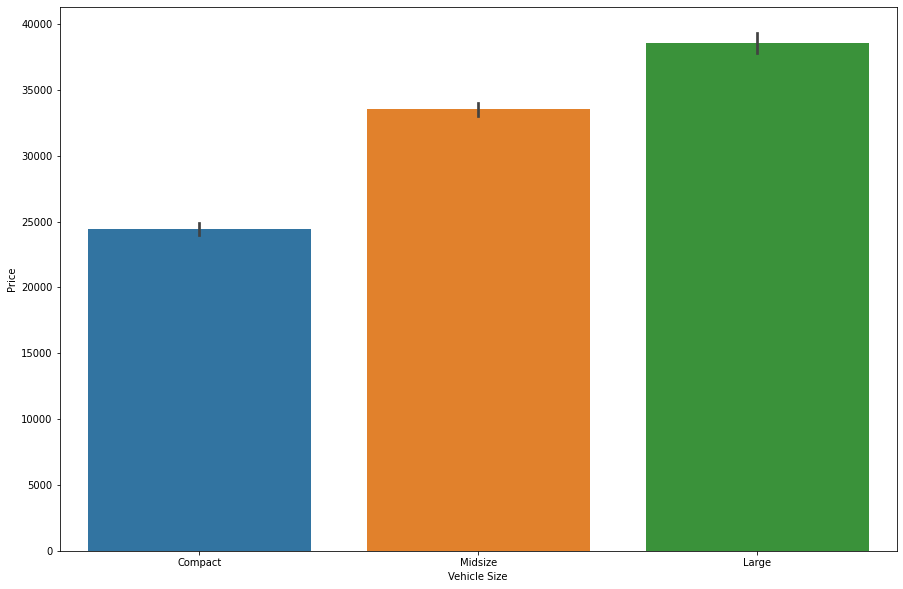

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(data['Vehicle Size'],data['Price'])

#### The Price increases in the following order :
    Compact
    Midsize
    Large

### 8.10 Vehicle Style and Price

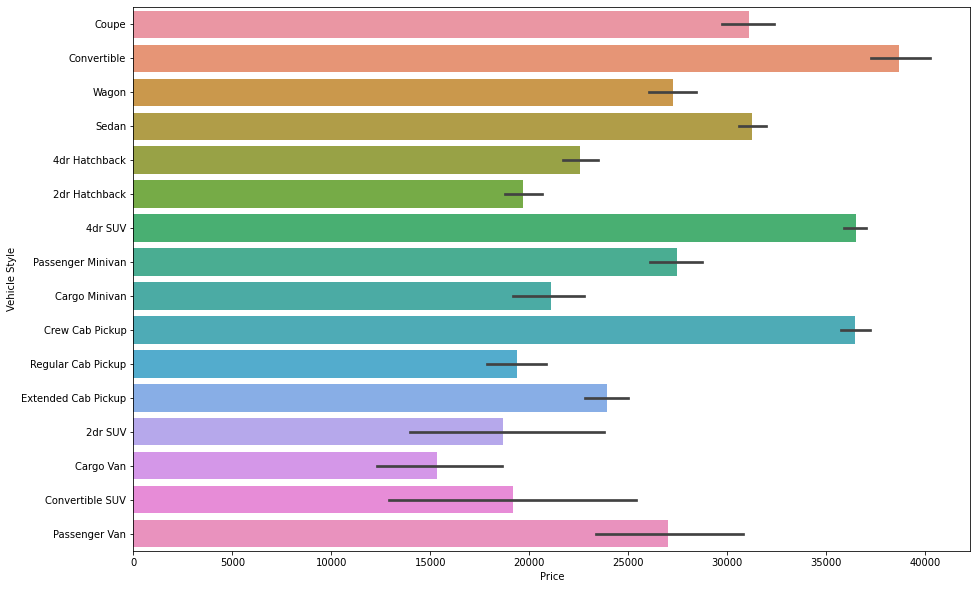

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(data['Price'], data['Vehicle Style'])

#### Price is also greatly affected by the Style of the Car
#### The most expensive type is Convertable

### 8.11 MPG-H and Price

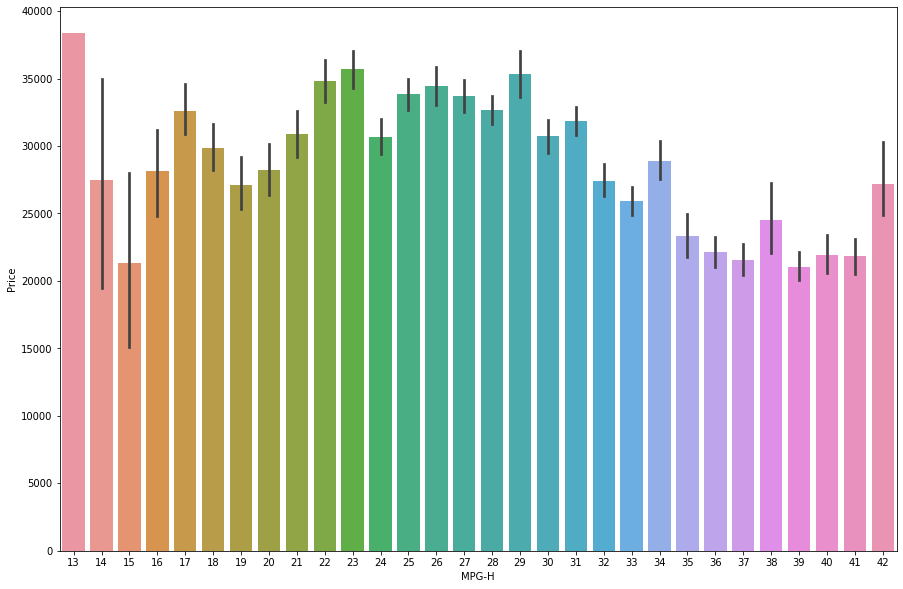

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-H'],data['Price'])

#### Most Expensive - 13 MPG-H
#### Least Expensive - 15 MPG-H

### 8.12 MPG-C and Price

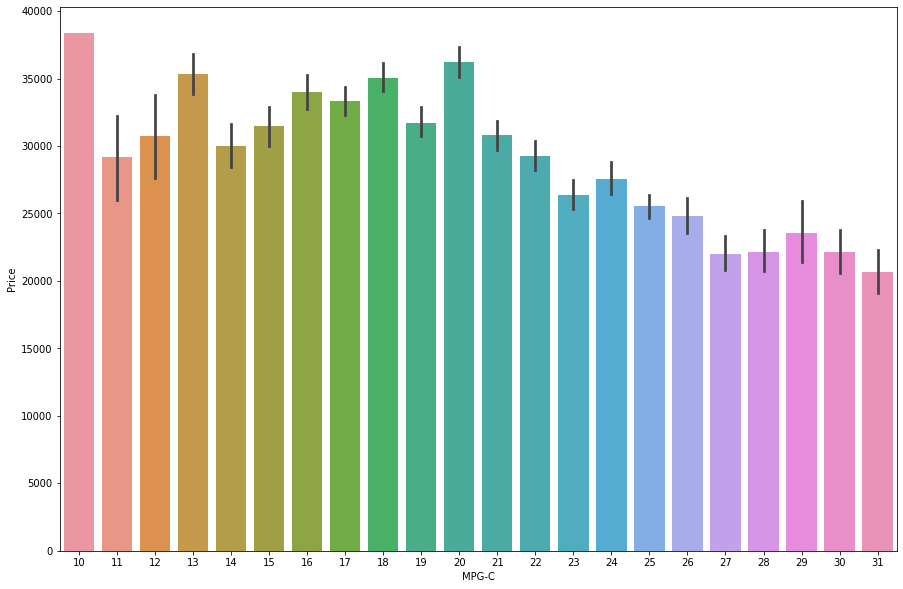

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-C'], data['Price'])

#### Most Expensive - 10 MPG-C
#### Least Expensive - 31 MPG-C

# Step 9 - Encoding and Splitting the Dataset then Building ML Model

## 9.1 Encoding and Splitting the Dataset

### 9.1.1 Endoding the Data

In [46]:
cat_data = ['Make', 'Model', 'Engine Fuel Type', 'Transmission', 'Drive Mode', 'Vehicle Size', 'Vehicle Style']
for i in cat_data:
  data[i]=data[i].astype("category")
  data[i]=data[i].cat.codes

In [47]:
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,3,0,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,3,0,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,3,0,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,3,0,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500


### 9.1.2 Scaling the Data

In [48]:
from sklearn import preprocessing
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(len(Y), 1)
X = preprocessing.StandardScaler().fit_transform(X)

print("X : \n",X[:5],"\nY : \n", Y[:5])

X : 
 [[-1.28898724 -1.64932562 -0.04757925 -0.1233371   1.27836477  0.43739675
   1.71028924  1.21653312 -1.86505389 -1.12450832 -0.06024937 -0.11854838
  -0.09820569  3.13117976]
 [-1.28898724 -1.65442896 -0.04757925 -0.1233371   0.82795495  0.43739675
   1.71028924  1.21653312 -1.86505389 -1.12450832 -0.46579027  0.23355891
  -0.09820569  3.13117976]
 [-1.28898724 -1.65442896 -0.04757925 -0.1233371   0.82795495  0.43739675
   1.71028924  1.21653312 -1.86505389 -1.12450832 -0.06024937  0.23355891
   0.13166184  3.13117976]
 [-1.28898724 -1.65442896 -0.04757925 -0.1233371  -0.0728647   0.43739675
   1.71028924  1.21653312 -1.86505389 -1.12450832 -0.06024937  0.23355891
  -0.32807321  3.13117976]
 [-1.28898724 -1.65442896 -0.04757925 -0.1233371  -0.0728647   0.43739675
   1.71028924  1.21653312 -1.86505389 -1.12450832 -0.46579027  0.23355891
  -0.32807321  3.13117976]] 
Y : 
 [[46135]
 [40650]
 [36350]
 [29450]
 [34500]]


### 9.1.3 Splitting the Data into Train and Test Sets

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=44)
print("Shape of X_train is :", X_train.shape, "\nShape of Y_train is :", Y_train.shape)
print("\n\nShape of X_test is :", X_test.shape, "\nShape of Y_test is :", Y_test.shape)

Shape of X_train is : (6887, 14) 
Shape of Y_train is : (6887, 1)


Shape of X_test is : (1722, 14) 
Shape of Y_test is : (1722, 1)


## 9.2 Building Machine Learning Models

### 9.2.1 Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred)) 
print("\n\nAccuracy : ", accuracy_score(Y_test, Y_pred)*100, "%")

Confusion Matrix:
 [[65  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]]


Accuracy :  6.736353077816492 %


### 9.2.2 Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
model = regg.fit(X_train,Y_train)

#Score Prediction

Y_pred = model.predict(X_test)
print("The Prediction Score is : ", model.score(X_test, Y_test)*100, "%")

The Prediction Score is :  73.60646164620806 %


#### Thus, Linear Regression Model is choosen and Decision Tree is completely discarded

# Step 10 - Checking Performance

### 10.1 R-Square

In [52]:
from sklearn.metrics import r2_score
import math

print('Coefficient of determination or R-Squared : %.3f' % r2_score(Y_test, Y_pred))

Coefficient of determination or R-Squared : 0.736


### 10.2 Mean Squared Error

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred))

MSE: 63827413.73


### 10.3 Root Mean Squared Error

In [54]:
from sklearn.metrics import mean_squared_error
import math

print('RMSE : %.2f' % math.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE : 7989.21


### 10.4 Mean Absolute Error

In [55]:
from sklearn.metrics import mean_absolute_error
import math

print('MAE :%.2f' % mean_absolute_error(Y_test, Y_pred))

MAE :6063.30
